There are totally 11 types of images with count of fingers from zero to 5 for each of left and right hand. The images are grayscale.
Train and validation images are 18K and test images are 3.6K.

Task :  
Build an Image classification model by using Neural Network (no Convolution). Check its performance metrics.   Performance metrics are F1 score for each class and overall accuracy .  

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [2]:
## Fingers  dictionary 
names = {'0R' : 0 , '0L' : 1  , '1R' : 2 , '1L' : 3 , '2R' : 4  , '2L' : 5 , '3R' : 6, '3L' : 7 , '4R' : 8 , '4L' : 9 , '5R' : 10 , '5L' : 11 }

In [3]:
import cv2
import os

def load_images_from_folder(folder):
    images = []
    img_class = []
    for filename in os.listdir(folder):
        img_class.append(filename[-6:-4] )
        img = cv2.imread(os.path.join(folder,filename), 0)
        img = cv2.resize(img , (224,224))
        if img is not None:
            images.append(img)
    return images, img_class

images , image_class = load_images_from_folder("../input/fingers/train")

In [4]:
type(images) , type(image_class)

(list, list)

In [5]:
images = np.array(images)
images.shape

(18000, 224, 224)

In [6]:
## convert the character class names to numeric values 
image_class_numeric = [names[i] for i in image_class]
image_class_numeric =  np.array(image_class_numeric)
pd.Series(image_class_numeric).value_counts()

8     1500
9     1500
0     1500
3     1500
5     1500
10    1500
7     1500
6     1500
11    1500
4     1500
2     1500
1     1500
dtype: int64

In [7]:
image_class_numeric = np.array(image_class_numeric)
image_class_numeric.shape

(18000,)

In [8]:
## Read in test images 
test_images , test_image_class = load_images_from_folder("../input/fingers/test")

In [9]:
type(test_images) , type(test_image_class)

(list, list)

In [10]:
x_test = np.array(test_images)
x_test.shape

(3600, 224, 224)

In [11]:
## convert the character class names to numeric values 
y_test = [names[i] for i in test_image_class]
y_test = np.array(y_test)
pd.Series(y_test).value_counts()

3     300
0     300
7     300
8     300
2     300
11    300
10    300
4     300
9     300
5     300
6     300
1     300
dtype: int64

In [ ]:
## add single channel to the images 
images = images.reshape(images.shape[0] , 224, 224, 1)
print(images.shape)
##
x_test = x_test.reshape(x_test.shape[0] , 224, 224, 1)
print(x_test.shape)

In [12]:
## Using sklearn train_test_split 
x_train, x_val, y_train, y_val = train_test_split(images, image_class_numeric , stratify = image_class_numeric, test_size = 0.25 , random_state = 12)


print("train size :{}".format(x_train.shape))
print("y_train size :{}".format(y_train.shape))
##
print("val size :{}".format(x_val.shape))
print("y_val size :{}".format(y_val.shape))
##
print("test size :{}".format(x_test.shape))
print("y_test size :{}".format(y_test.shape))


train size :(13500, 224, 224)
y_train size :(13500,)
val size :(4500, 224, 224)
y_val size :(4500,)
test size :(3600, 224, 224)
y_test size :(3600,)


In [13]:
pd.Series(y_train).value_counts()

7     1125
10    1125
0     1125
2     1125
4     1125
6     1125
1     1125
5     1125
11    1125
3     1125
9     1125
8     1125
dtype: int64

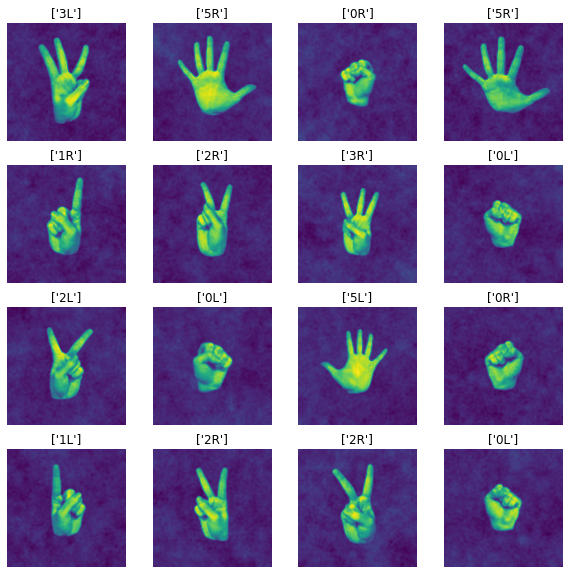

In [14]:
## visualize train set images

plt.figure(figsize=(10, 10))
for i in range(16):
    ax = plt.subplot(4, 4, i + 1)    
    plt.imshow(x_train[i])
    #
    label = y_train[i]
    name = [k for k, v in names.items() if v == label]
    plt.title(name)
    plt.axis("off")

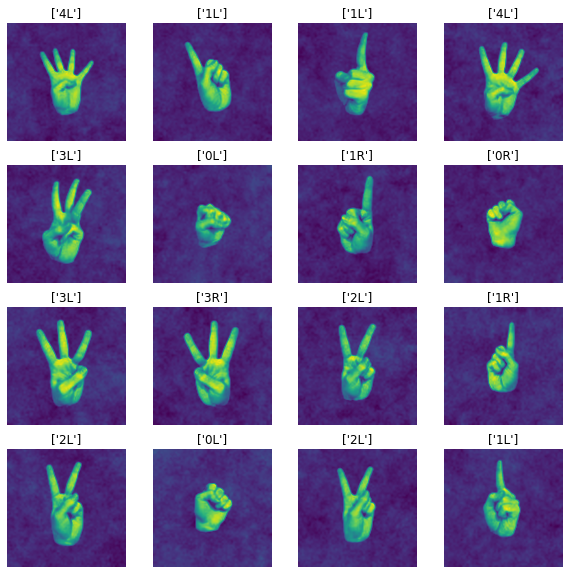

In [15]:
## visualize validation set images

plt.figure(figsize=(10, 10))
for i in range(16):
    ax = plt.subplot(4, 4, i + 1)    
    plt.imshow(x_val[i])
    #
    label = y_val[i]
    name = [k for k, v in names.items() if v == label]
    plt.title(name)
    plt.axis("off")

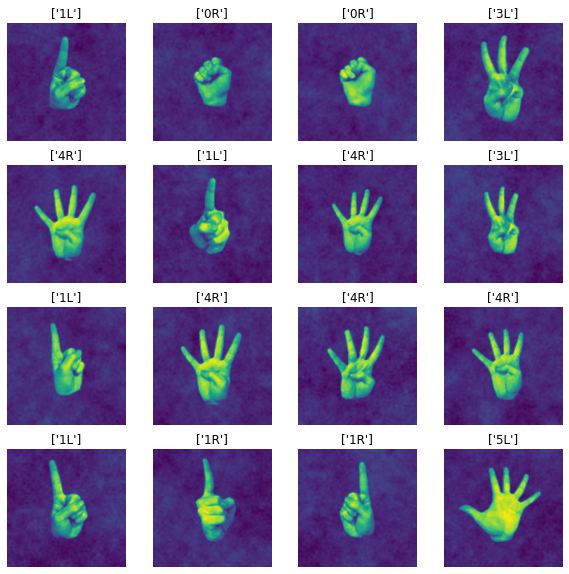

In [16]:
## visualize test set images

plt.figure(figsize=(10, 10))
for i in range(16):
    ax = plt.subplot(4, 4, i + 1)    
    plt.imshow(x_test[i])
    #
    label = y_test[i]
    name = [k for k, v in names.items() if v == label]
    plt.title(name)
    plt.axis("off")

2022-02-08 03:49:28.682609: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-08 03:49:28.800718: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-08 03:49:28.801770: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-08 03:49:28.803422: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

CPU times: user 1min 38s, sys: 12.5 s, total: 1min 51s
Wall time: 2min 23s
422/422 [==============================] - 1s 3ms/step - loss: 1.7633e-04 - accuracy: 1.0000
Train image accuracy :1.0
113/113 [==============================] - 0s 3ms/step - loss: 0.0027 - accuracy: 0.9992
Test image accuracy :0.9991666674613953
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 224, 224)          0         
_________________________________________________________________
flatten (Flatten)            (None, 50176)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               25690624  
_________________________________________________________________
dense_1 (Dense)              (None, 12)                6156      
Total params: 25,696,780
Trainable params: 25,696,780
Non-train

2022-02-08 03:51:59.072693: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


              precision    recall  f1-score   support

          0R       1.00      1.00      1.00       300
          0L       1.00      1.00      1.00       300
          1R       1.00      1.00      1.00       300
          1L       1.00      1.00      1.00       300
          2R       0.99      1.00      1.00       300
          2L       1.00      1.00      1.00       300
          3R       1.00      0.99      1.00       300
          3L       1.00      1.00      1.00       300
          4R       1.00      1.00      1.00       300
          4L       1.00      1.00      1.00       300
          5R       1.00      1.00      1.00       300
          5L       1.00      1.00      1.00       300

    accuracy                           1.00      3600
   macro avg       1.00      1.00      1.00      3600
weighted avg       1.00      1.00      1.00      3600



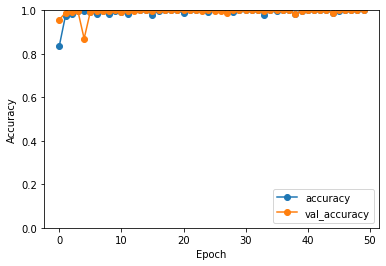

In [17]:
model = tf.keras.models.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
    
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(512, activation=tf.nn.relu),
tf.keras.layers.Dense(12, activation=tf.nn.softmax)])


model.compile(optimizer= tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'], )
%time history = model.fit(x_train ,y_train , epochs=50, validation_data = (x_val ,y_val ), verbose = 0)
##
train_loss, train_acc = model.evaluate(x_train, y_train)
print("Train image accuracy :{}".format(train_acc))
test_loss, test_acc = model.evaluate(x_test , y_test)
print("Test image accuracy :{}".format(test_acc))
##
##
plt.plot(history.history['accuracy'], '-o' ,label='accuracy')
plt.plot(history.history['val_accuracy'], '-o', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
##
print(model.summary())

model.save('cnn_2')
##
test_predicted = model.predict(x_test)
##
predicted_label = []
for i in test_predicted:
    label =  np.argmax(i, axis = -1)
    predicted_label.append(label)
    
## classification report 
print(classification_report(y_test, predicted_label, target_names = [k for k,v in names.items()]))

CPU times: user 1min 36s, sys: 10.6 s, total: 1min 46s
Wall time: 1min 19s
422/422 [==============================] - 1s 3ms/step - loss: 2.4849 - accuracy: 0.0833
Train image accuracy :0.0833333358168602
113/113 [==============================] - 0s 3ms/step - loss: 2.4849 - accuracy: 0.0833
Test image accuracy :0.0833333358168602
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 224, 224)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 50176)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 401416    
_________________________________________________________________
dense_3 (Dense)              (None, 16)                144       
__________________________________________________

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

          0R       0.00      0.00      0.00       300
          0L       0.00      0.00      0.00       300
          1R       0.00      0.00      0.00       300
          1L       0.00      0.00      0.00       300
          2R       0.00      0.00      0.00       300
          2L       0.00      0.00      0.00       300
          3R       0.00      0.00      0.00       300
          3L       0.00      0.00      0.00       300
          4R       0.08      1.00      0.15       300
          4L       0.00      0.00      0.00       300
          5R       0.00      0.00      0.00       300
          5L       0.00      0.00      0.00       300

    accuracy                           0.08      3600
   macro avg       0.01      0.08      0.01      3600
weighted avg       0.01      0.08      0.01      3600



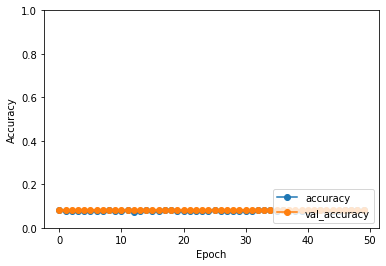

In [18]:
## check with two dense layers 

model = tf.keras.models.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(8, activation=tf.nn.relu),
    tf.keras.layers.Dense(16, activation=tf.nn.relu),
tf.keras.layers.Dense(12, activation=tf.nn.softmax)])


model.compile(optimizer= tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'], )
%time history = model.fit(x_train ,y_train , epochs=50, validation_data = (x_val ,y_val ), verbose = 0)
##
train_loss, train_acc = model.evaluate(x_train, y_train)
print("Train image accuracy :{}".format(train_acc))
test_loss, test_acc = model.evaluate(x_test , y_test)
print("Test image accuracy :{}".format(test_acc))
##
##
plt.plot(history.history['accuracy'], '-o' ,label='accuracy')
plt.plot(history.history['val_accuracy'], '-o', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
##
print(model.summary())

model.save('dense_2')
##
test_predicted = model.predict(x_test)
##
predicted_label = []
for i in test_predicted:
    label =  np.argmax(i, axis = -1)
    predicted_label.append(label)
    
## classification report 
print(classification_report(y_test, predicted_label, target_names = [k for k,v in names.items()]))

CPU times: user 1min 32s, sys: 10.3 s, total: 1min 42s
Wall time: 1min 23s
422/422 [==============================] - 1s 3ms/step - loss: 0.2662 - accuracy: 0.9504
Train image accuracy :0.9504444599151611
113/113 [==============================] - 0s 3ms/step - loss: 0.3622 - accuracy: 0.9450
Test image accuracy :0.9449999928474426
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_2 (Rescaling)      (None, 224, 224)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 50176)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               6422656   
_________________________________________________________________
dense_6 (Dense)              (None, 12)                1548      
Total params: 6,424,204
Trainable params: 6,424,20

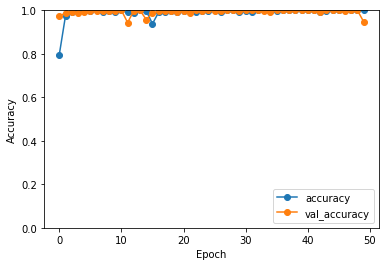

In [19]:
## single dense layer with 128 neurons 

model = tf.keras.models.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(128, activation=tf.nn.relu),
tf.keras.layers.Dense(12, activation=tf.nn.softmax)])


model.compile(optimizer= tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'], )
%time history = model.fit(x_train ,y_train , epochs=50, validation_data = (x_val ,y_val ), verbose = 0)
##
train_loss, train_acc = model.evaluate(x_train, y_train)
print("Train image accuracy :{}".format(train_acc))
test_loss, test_acc = model.evaluate(x_test , y_test)
print("Test image accuracy :{}".format(test_acc))
##
##
plt.plot(history.history['accuracy'], '-o' ,label='accuracy')
plt.plot(history.history['val_accuracy'], '-o', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
##
print(model.summary())

model.save('dense_128')
##
test_predicted = model.predict(x_test)
##
predicted_label = []
for i in test_predicted:
    label =  np.argmax(i, axis = -1)
    predicted_label.append(label)
    
## classification report 
print(classification_report(y_test, predicted_label, target_names = [k for k,v in names.items()]))

The model above gave an accuracy of 0.94. This can be improved. 

CPU times: user 1min 33s, sys: 10.5 s, total: 1min 44s
Wall time: 1min 23s
422/422 [==============================] - 1s 3ms/step - loss: 0.0031 - accuracy: 0.9991
Train image accuracy :0.9991111159324646
113/113 [==============================] - 0s 4ms/step - loss: 0.0046 - accuracy: 0.9983
Test image accuracy :0.9983333349227905
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_3 (Rescaling)      (None, 224, 224)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 50176)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               12845312  
_________________________________________________________________
dense_8 (Dense)              (None, 12)                3084      
Total params: 12,848,396
Trainable params: 12,848,

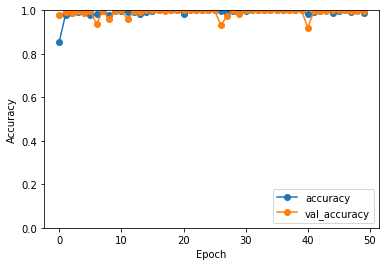

In [20]:
## single dense layer with 256 neurons 

model = tf.keras.models.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(256, activation=tf.nn.relu),
tf.keras.layers.Dense(12, activation=tf.nn.softmax)])


model.compile(optimizer= tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'], )
%time history = model.fit(x_train ,y_train , epochs=50, validation_data = (x_val ,y_val ), verbose = 0)
##
train_loss, train_acc = model.evaluate(x_train, y_train)
print("Train image accuracy :{}".format(train_acc))
test_loss, test_acc = model.evaluate(x_test , y_test)
print("Test image accuracy :{}".format(test_acc))
##
##
plt.plot(history.history['accuracy'], '-o' ,label='accuracy')
plt.plot(history.history['val_accuracy'], '-o', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
##
print(model.summary())

model.save('dense_256')
##
test_predicted = model.predict(x_test)
##
predicted_label = []
for i in test_predicted:
    label =  np.argmax(i, axis = -1)
    predicted_label.append(label)
    
## classification report 
print(classification_report(y_test, predicted_label, target_names = [k for k,v in names.items()]))

CPU times: user 37.1 s, sys: 4.82 s, total: 41.9 s
Wall time: 32 s
422/422 [==============================] - 1s 3ms/step - loss: 4.9755e-04 - accuracy: 1.0000
Train image accuracy :1.0
113/113 [==============================] - 0s 3ms/step - loss: 9.2307e-04 - accuracy: 1.0000
Test image accuracy :1.0
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_5 (Rescaling)      (None, 224, 224)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 50176)             0         
_________________________________________________________________
dense_11 (Dense)             (None, 156)               7827612   
_________________________________________________________________
dense_12 (Dense)             (None, 12)                1884      
Total params: 7,829,496
Trainable params: 7,829,496
Non-trainable params: 0
____

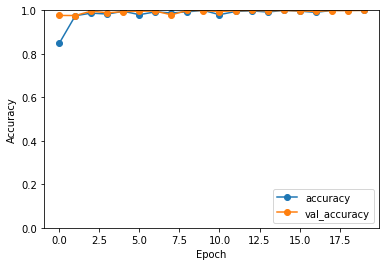

In [22]:
## single dense layer with 156 neurons 

model = tf.keras.models.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(156, activation=tf.nn.relu),
tf.keras.layers.Dense(12, activation=tf.nn.softmax)])


model.compile(optimizer= tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'], )
%time history = model.fit(x_train ,y_train , epochs=20, validation_data = (x_val ,y_val ), verbose = 0)
##
train_loss, train_acc = model.evaluate(x_train, y_train)
print("Train image accuracy :{}".format(train_acc))
test_loss, test_acc = model.evaluate(x_test , y_test)
print("Test image accuracy :{}".format(test_acc))
##
##
plt.plot(history.history['accuracy'], '-o' ,label='accuracy')
plt.plot(history.history['val_accuracy'], '-o', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
##
print(model.summary())

model.save('dense_156')
##
test_predicted = model.predict(x_test)
##
predicted_label = []
for i in test_predicted:
    label =  np.argmax(i, axis = -1)
    predicted_label.append(label)
    
## classification report 
print(classification_report(y_test, predicted_label, target_names = [k for k,v in names.items()]))

Model with 156 neurons gives an accuracy of 1.

CPU times: user 38 s, sys: 4.69 s, total: 42.7 s
Wall time: 33.2 s
422/422 [==============================] - 2s 4ms/step - loss: 0.0139 - accuracy: 0.9955
Train image accuracy :0.9954814910888672
113/113 [==============================] - 0s 3ms/step - loss: 0.0226 - accuracy: 0.9922
Test image accuracy :0.992222249507904
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_6 (Rescaling)      (None, 224, 224)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 50176)             0         
_________________________________________________________________
dense_13 (Dense)             (None, 130)               6523010   
_________________________________________________________________
dense_14 (Dense)             (None, 12)                1572      
Total params: 6,524,582
Trainable params: 6,524,582
Non-tra

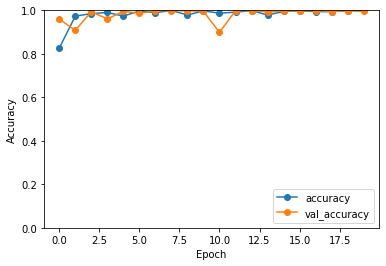

In [23]:
## check with 130 neurons 

model = tf.keras.models.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(130, activation=tf.nn.relu),
tf.keras.layers.Dense(12, activation=tf.nn.softmax)])


model.compile(optimizer= tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'], )
%time history = model.fit(x_train ,y_train , epochs=20, validation_data = (x_val ,y_val ), verbose = 0)
##
train_loss, train_acc = model.evaluate(x_train, y_train)
print("Train image accuracy :{}".format(train_acc))
test_loss, test_acc = model.evaluate(x_test , y_test)
print("Test image accuracy :{}".format(test_acc))
##
##
plt.plot(history.history['accuracy'], '-o' ,label='accuracy')
plt.plot(history.history['val_accuracy'], '-o', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
##
print(model.summary())

model.save('dense_130')
##
test_predicted = model.predict(x_test)
##
predicted_label = []
for i in test_predicted:
    label =  np.argmax(i, axis = -1)
    predicted_label.append(label)
    
## classification report 
print(classification_report(y_test, predicted_label, target_names = [k for k,v in names.items()]))

CPU times: user 38 s, sys: 4.64 s, total: 42.6 s
Wall time: 42.5 s
422/422 [==============================] - 1s 3ms/step - loss: 7.9231e-04 - accuracy: 1.0000
Train image accuracy :1.0
113/113 [==============================] - 0s 3ms/step - loss: 0.0045 - accuracy: 0.9981
Test image accuracy :0.9980555772781372
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_7 (Rescaling)      (None, 224, 224)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 50176)             0         
_________________________________________________________________
dense_15 (Dense)             (None, 100)               5017700   
_________________________________________________________________
dense_16 (Dense)             (None, 12)                1212      
Total params: 5,018,912
Trainable params: 5,018,912
Non-trainable par

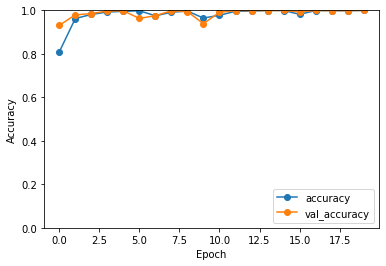

In [24]:
## check with 100 neurons 

model = tf.keras.models.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(100, activation=tf.nn.relu),
tf.keras.layers.Dense(12, activation=tf.nn.softmax)])


model.compile(optimizer= tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'], )
%time history = model.fit(x_train ,y_train , epochs=20, validation_data = (x_val ,y_val ), verbose = 0)
##
train_loss, train_acc = model.evaluate(x_train, y_train)
print("Train image accuracy :{}".format(train_acc))
test_loss, test_acc = model.evaluate(x_test , y_test)
print("Test image accuracy :{}".format(test_acc))
##
##
plt.plot(history.history['accuracy'], '-o' ,label='accuracy')
plt.plot(history.history['val_accuracy'], '-o', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
##
print(model.summary())

model.save('dense_100')
##
test_predicted = model.predict(x_test)
##
predicted_label = []
for i in test_predicted:
    label =  np.argmax(i, axis = -1)
    predicted_label.append(label)
    
## classification report 
print(classification_report(y_test, predicted_label, target_names = [k for k,v in names.items()]))

Summary : 
Single layer NN with dense layer of 100 neurons gives the best test set accuracy of 1.  
This is the most simplistic NN model that is achieved.  
  
Train two more models with the same parameters above on different slices of train and validation images and then test it on test set images.  
